# Worksheet 16

Name:  Aidan Clark

UID: U01817265

### Topics

- Support Vector Machines (Non-linear case)

## Support Vector Machines

Follow along in class to implement the perceptron algorithm and create an animation of the algorithm.

a) As we saw in class, the form
$$w^T x + b = 0$$
while simple, does not expose the inner product `<x_i, x_j>` which we know `w` depends on, having done the math. This is critical to applying the "kernel trick" which allows for learning non-linear decision boundaries. Let's modify the above algorithm to use the form
$$\sum_i \alpha_i <x_i, x> + b = 0$$

In [32]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
import math
from numpy.linalg import norm

TEMPFILE = "temp.png"
CENTERS = [[0, 1], [1, 0]]

epochs = 100
learning_rate = .05
expanding_rate = .99
retracting_rate = 1.1

#X, labels = datasets.make_blobs(n_samples=10, centers=CENTERS, cluster_std=0.2, random_state=0)
#Y = np.array(list(map(lambda x : -1 if x == 0 else 1, labels.tolist())))

data = np.loadtxt("spiral.data")
X, labels = data[:, :2], data[:, 2]
Y = np.array(list(map(lambda x : -1 if x == -1 else 1, labels.tolist())))

alpha_i = np.zeros((len(X),))
b = 0


def polynomial(x_i, x_j, c, n):
    return (np.dot(x_i, x_j) + c) ** n

def radial(x_i, x_j, sigma):
    return math.exp(norm(x_i - x_j)/sigma)

def snap(x, alpha_i, b, error):
    # create a mesh to plot in
    h = .01  # step size in the mesh
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    meshData = np.c_[xx.ravel(), yy.ravel()]
    cs = np.array([x for x in 'gb'])
    fig, ax = plt.subplots()
    #ax.scatter(X[:,0],X[:,1],color=cs[labels].tolist(), s=50, alpha=0.8)
    ax.scatter(X[:,0],X[:,1],c=labels, s=50, alpha=0.8)
    if error:
        ax.add_patch(plt.Circle((x[0], x[1]), .12, color='r',fill=False))
    else:
        ax.add_patch(plt.Circle((x[0], x[1]), .12, color='y',fill=False))
   
    Z = predict_many(alpha_i, b, meshData)
    Z = np.array([0 if z <=0 else 1 for z in Z]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=.5, cmap=plt.cm.Paired)
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))

def predict_many(alpha_i, b, Z):
    res = []
    for i in range(len(Z)):
        res.append(predict(alpha_i, b, Z[i]))
    return np.array(res)

def predict(alpha_i, b, x):
    alphaTimesInner = 0
    #Summing over alpha times inner products of all of the data
    for j in range(len(X)):
        #alphaTimesInner += alpha_i[j] * np.dot(X[j], x) #Linearly separable
        alphaTimesInner += alpha_i[j] * radial(X[j], x, sigma = 50)
    return alphaTimesInner + b
    
"""
images = []
for _ in range(epochs):
    # pick a point from X at random
    i = np.random.randint(0, len(X))
    error = False
    x, y = X[i], Y[i]
    
    #Using last week's lecture code
    y_predict = predict(alpha_i, b, x)
    if not(y < 0 and y_predict < 0 or y >= 0 and y_predict >= 0):
        #misclassified
        error = True
        #Move line in direction of misclassified point
        alpha_i[i] += y * learning_rate
        alpha_i = alpha_i * expanding_rate
        b += y * learning_rate * expanding_rate
    
    else:
        #Classified correctly but...
        #are you in the street
        if (y_predict < 1 and y_predict > -1):
            #in street
            alpha_i[i] += y * learning_rate
            alpha_i = alpha_i * retracting_rate           
            b += y * learning_rate * retracting_rate
        
    images.append(snap(x, alpha_i, b, error))

images[0].save(
    'svm_dual.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=100
)
"""

"\nimages = []\nfor _ in range(epochs):\n    # pick a point from X at random\n    i = np.random.randint(0, len(X))\n    error = False\n    x, y = X[i], Y[i]\n    \n    #Using last week's lecture code\n    y_predict = predict(alpha_i, b, x)\n    if not(y < 0 and y_predict < 0 or y >= 0 and y_predict >= 0):\n        #misclassified\n        error = True\n        #Move line in direction of misclassified point\n        alpha_i[i] += y * learning_rate\n        alpha_i = alpha_i * expanding_rate\n        b += y * learning_rate * expanding_rate\n    \n    else:\n        #Classified correctly but...\n        #are you in the street\n        if (y_predict < 1 and y_predict > -1):\n            #in street\n            alpha_i[i] += y * learning_rate\n            alpha_i = alpha_i * retracting_rate           \n            b += y * learning_rate * retracting_rate\n        \n    images.append(snap(x, alpha_i, b, error))\n\nimages[0].save(\n    'svm_dual.gif',\n    optimize=False,\n    save_all=True,\n

Write a configurable kernel function to apply in lieu of the dot product. Try it out on a dataset that is not linearly separable.

In [30]:
def polynomial(x_i, x_j, c, n):
    return (np.dot(x_i, x_j) + c) ** n

#Let's try on the spiral.data
#I'm editing the code above, so it won't work for the linearly separable one any more
data = np.loadtxt("spiral.data")
X, Y = data[:, :2], data[:, 2]


images = []
for _ in range(50):
    # pick a point from X at random
    i = np.random.randint(0, len(X))
    error = False
    x, y = X[i], Y[i]
    
    #Using last week's lecture code
    y_predict = predict(alpha_i, b, x)
    if not(y < 0 and y_predict < 0 or y >= 0 and y_predict >= 0):
        #misclassified
        error = True
        #Move line in direction of misclassified point
        alpha_i[i] += y * learning_rate
        alpha_i = alpha_i * expanding_rate
        b += y * learning_rate * expanding_rate
    
    else:
        #Classified correctly but...
        #are you in the street
        if (y_predict < 1 and y_predict > -1):
            #in street
            alpha_i[i] += y * learning_rate
            alpha_i = alpha_i * retracting_rate           
            b += y * learning_rate * retracting_rate
        
    images.append(snap(x, alpha_i, b, error))

    images[0].save(
    'svm_polynomial.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=100
    )

#Yeah that worked pretty terribly!


b) Assume we fit an SVM using a polynomial Kernel function and it seems to overfit the data. How would you adjust the tuning parameter `n` of the kernel function?

I would lower the value of n, since this will bring us closer to the regular inner product kernel and thus make the space less complex and less overfitted to the data.

c) Assume we fit an SVM using a RBF Kernel function and it seems to underfit the data. How would you adjust the tuning parameter `sigma` of the kernel function?

I would increase the value of sigma, since this would make the space "curvier" and more complex, which would hopefully allow it to better distinguish between the two classes in the data

d) Tune the parameter of a specific Kernel function, to fit an SVM (using your code above) to the following dataset:

KeyboardInterrupt: 

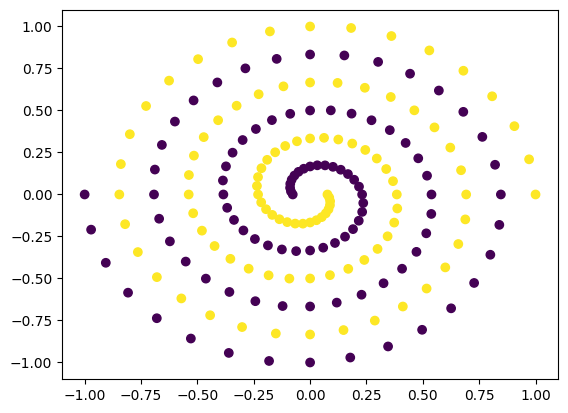

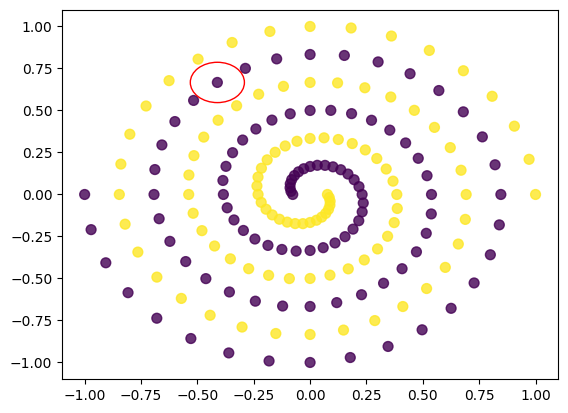

In [34]:
import numpy as np
import matplotlib.pyplot as plt

def radial(x_i, x_j, sigma):
    return math.exp(norm(x_i - x_j)/sigma)

data = np.loadtxt("spiral.data")
x, y = data[:, :2], data[:, 2]

plt.scatter(x[:,0], x[:,1], c=y)



images = []
for _ in range(10):
    # pick a point from X at random
    i = np.random.randint(0, len(X))
    error = False
    x, y = X[i], Y[i]
    
    #Using last week's lecture code
    y_predict = predict(alpha_i, b, x)
    if not(y < 0 and y_predict < 0 or y >= 0 and y_predict >= 0):
        #misclassified
        error = True
        #Move line in direction of misclassified point
        alpha_i[i] += y * learning_rate
        alpha_i = alpha_i * expanding_rate
        b += y * learning_rate * expanding_rate
    else:
        #Classified correctly but...
        #are you in the street
        if (y_predict < 1 and y_predict > -1):
            #in street
            alpha_i[i] += y * learning_rate
            alpha_i = alpha_i * retracting_rate           
            b += y * learning_rate * retracting_rate
        
    images.append(snap(x, alpha_i, b, error))

    images[0].save(
    'svm_spiral.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=100
    )
    
